# Landmask

In [1]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
# import mapfxn as mf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
# reload(mf)


#### masks of different regions 2 is atl, 3 is ind, 4 is pac, 1 is land, using the ORCA grid

In [2]:
basin= nc.Dataset('/gpfs/home/e415/data/masks/basin_masks.nc')
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')

nav_lat = basin['Y'][:]
nav_lon = basin['X'][:]


ATL = basin['ATL'][:,:]; 
PAC = basin['PAC'][:,:]; IND = basin['IND'][:,:]
SO = basin['SO'][:,:]; ARCTIC = basin['ARCTIC'][:,:]; P1 = basin['P1'][:,:]
P2 = basin['P2'][:,:]; P3 = basin['P3'][:,:]; P4 = basin['P4'][:,:]
P5 = basin['P5'][:,:]; A1 = basin['A1'][:,:]; A2 = basin['A2'][:,:]
A3 = basin['A3'][:,:]; A4 = basin['A4'][:,:]; A5 = basin['A5'][:,:]
I3 = basin['I3'][:,:]; I4 = basin['I4'][:,:]; I5 = basin['I5'][:,:]

msks = [ATL, PAC, IND, SO, ARCTIC, P1, P2, P3, P4, P5, A1, A2, A3, A4, A5, I3, I4, I5]
titles = ['ATL', 'PAC', 'IND', 'SO', 'ARCTIC', 'P1', 'P2', 'P3',
          'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

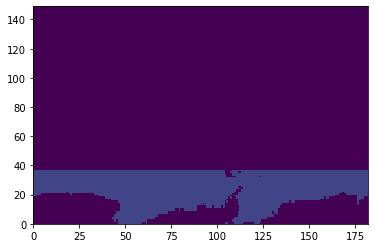

In [3]:
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')
basin

plt.pcolormesh(basin['SO'], vmin = 0, vmax = 5)

(149, 182)


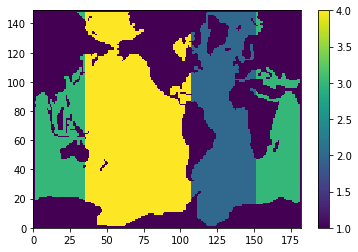

In [4]:
w = nc.Dataset('../UTILS/simple_landmask.nc')  
#this was made from /gpfs/home/yzh17dvu/scratch/ModelRuns/basin_mask.nc 1 is land 0 is water

so_oneline = np.zeros_like(A5[30,:])


so_oneline[A5[30,:]==1] = 2
so_oneline[I5[30,:]==1] = 3
so_oneline[so_oneline == 0] = 4
# print(so_oneline)
# print(np.shape(so_oneline))

so_oneline_ATL = np.zeros_like(A5[30,:])

lmask = (w['mask'][:])
print(np.shape(lmask))
sectormask = np.zeros_like(lmask)

for i in range(0,149):
    sectormask[i,:] = so_oneline

sectormask[lmask ==1]=1

plt.pcolormesh(sectormask)
plt.colorbar()


In [5]:
fn = f'../UTILS/sector_landmask.nc'        
ds = nc.Dataset(fn, 'w', format='NETCDF4')
ds.description = 'made in EVAL_forcing/so_landmask.ipynb, 1 land, 2 atl, 3 ind, 4 pac'
x = ds.createDimension('x',182)
y = ds.createDimension('y',149)
mm = ds.createVariable('sectormask', 'f4', ( 'y','x'))
mm[:] = sectormask[:]
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: made in EVAL_forcing/so_landmask.ipynb, 1 land, 2 atl, 3 ind, 4 pac
    dimensions(sizes): x(182), y(149)
    variables(dimensions): float32 sectormask(y,x)
    groups: 


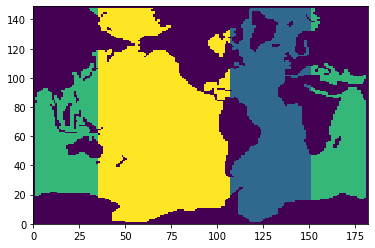

In [6]:
w = nc.Dataset('../UTILS/sector_landmask.nc')  
print(w)
sectormask = (w['sectormask'][:])

plt.pcolormesh(sectormask)

landmask looks good, projecting it onto cartopy doesn't. 


NameError: name 'mf' is not defined

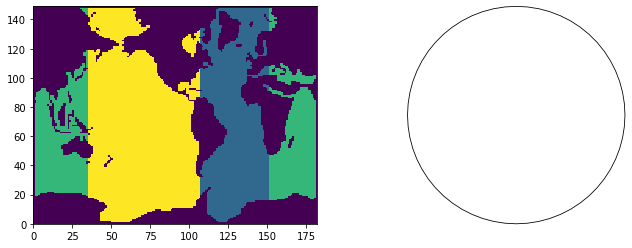

In [7]:
fact = 0.4
fig = plt.figure(figsize=[28*fact, 10*fact])
ax1 = fig.add_subplot(1, 2, 1)

plt.pcolormesh(sectormask)

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(0, -90))

mf.plot_southern(fig, ax1, nav_lon[0:37,:], nav_lat[0:37,:], sectormask[0:37,:], 0, 
                  4, 1, northex = -50, fs = 12, tit = '', cbarlab = '', tcmap = 'viridis', lm = True)

# Let's do the same thing, but with the regridded landmask product that is 180 by 360. anticipate that it will solve my problems with ugliness (above)

In [ ]:
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks.nc')
print(basin)
y = basin['Y'][:]
x = basin['X'][:]

yv, xv = np.meshgrid(y, x, indexing='ij') 

print(xv[0:5,0:5])
print(yv[0:5,0:5])

w = plt.pcolormesh(basin['ATL'][0,:,:])
plt.colorbar(w)


In [ ]:
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks.nc')
print(basin)
y = basin['Y'][:]
x = basin['X'][:]

yv, xv = np.meshgrid(y, x, indexing='ij') 

print(xv[0:5,0:5])
print(yv[0:5,0:5])

ATL = basin['ATL'][0,:,:]
PAC = basin['PAC'][0,:,:]
IND = basin['IND'][0,:,:]
ARC = basin['ARCTIC'][0,:,:]

sectormask = np.zeros_like(xv)
sectormask[ATL>0]=2
sectormask[IND>0]=3
sectormask[PAC>0]=4
sectormask[ARC>0]=5
sectormask[sectormask<1]=1
w = plt.pcolormesh(sectormask)
plt.colorbar(w)


In [ ]:
fact = 0.4
fig = plt.figure(figsize=[28*fact, 10*fact])
ax1 = fig.add_subplot(1, 2, 1)

plt.pcolormesh(sectormask)

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(0, -90))

mf.plot_southern(fig, ax1, xv[0:37,:], yv[0:37,:], sectormask[0:37,:], 0, 
                  5, 1, northex = -50, fs = 12, tit = '', cbarlab = '', tcmap = 'viridis', lm = True)

In [ ]:
fn = f'../UTILS/sector_landmask_regrid.nc'        
ds = nc.Dataset(fn, 'w', format='NETCDF4')
ds.description = 'made in EVAL_forcing/so_landmask.ipynb, 1 land, 2 atl, 3 ind, 4 pac'
x = ds.createDimension('x',360)
y = ds.createDimension('y',180)
mm = ds.createVariable('sectormask', 'f4', ( 'y','x'))
mm[:] = sectormask[:]
mm = ds.createVariable('nav_lat', 'f4', ( 'y','x'))
mm[:] = yv[:]
mm = ds.createVariable('nav_lon', 'f4', ( 'y','x'))
mm[:] = xv[:]
ds.close()